In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_excel("homepricepredict.xlsx") #pip install xlrd for support .xlsx file
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


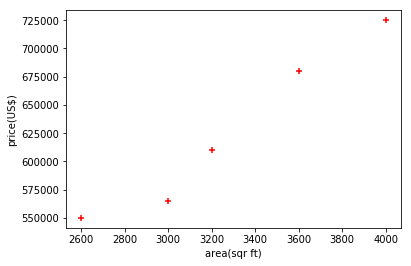

In [3]:
%matplotlib inline
plt.xlabel("area(sqr ft)")
plt.ylabel("price(US$)")
plt.scatter(df.area,df.price,color="red",marker="+")

In [4]:
df.area
df.price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [5]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
reg.predict([[7000]])

array([1131130.1369863])

In [7]:
reg.coef_

array([135.78767123])

In [8]:
reg.intercept_

180616.43835616432

In [9]:
(135.78767123 * 3000) +180616.43835616432 #y = mx + b

587979.4520461643

In [10]:
tst = pd.read_excel('testhomeprice.xlsx')
tst

,area,price
0,5000,8.595548e+05
1,6000,9.953425e+05
2,3200,6.151370e+05
3,6500,1.063236e+06
4,4523,7.947841e+05
5,1200,3.435616e+05
6,5600,9.410274e+05
7,9500,1.470599e+06
8,6200,1.022500e+06


In [11]:
p = reg.predict(tst[['area']])
tst['price'] = p
tst.to_excel('testhomeprice.xlsx' , index=False) #pip install openpyxl 

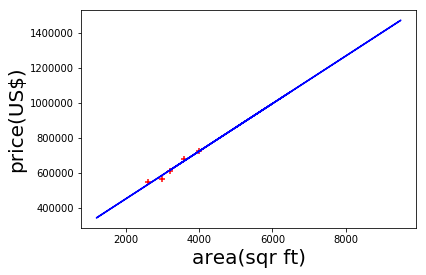

In [12]:
%matplotlib inline
plt.xlabel("area(sqr ft)" , fontsize=20)
plt.ylabel("price(US$)", fontsize=20)
plt.scatter(df.area,df.price,color="red",marker="+")
plt.plot(tst.area,tst.price,color='blue')

In [13]:
from sklearn.externals import joblib
joblib.dump(reg , 'home_price_predict_binary')

['home_price_predict_binary']

In [14]:
mp = joblib.load('home_price_predict_binary')
mp.predict([[5000]])

array([859554.79452055])